  # SK00 - Scikit-Learn Grundlagen

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Sample-Matrix und Target-Values

`scikit-learn` kommt mit zahlreichen Methoden zur Erstellung von Testdaten.

sklearn teilt Daten wie folgt ein:

* Die _Sample-Matrix_ __X__, bestehend aus N Samples mit jeweils M Features: X = (samples, features)
* Die _Target-Values_ __y__, bestehend aus reellen Größen für regressionen und ganzzahligen Größen für Klassifizierungen.

Diese Daten sind meist Numpy-Arrays.

In [2]:
import sklearn.datasets as ds

In [3]:
print(ds.get_data_home())

C:\Users\Admin\Documents\Projects\python\ki\scikit_learn_data


### Beispiele

#### Regressions-Daten

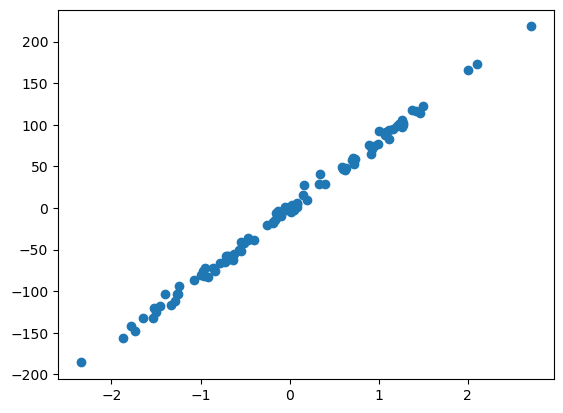

In [4]:
X, y = ds.make_regression(n_samples=100, n_features=1, noise=5)
plt.scatter(X,y)

plt.plot();

## Pre-Processing

### Beispiele

#### Standard-Scaler

Der Standard-Scaler skaliert die übergebenen Daten auf die __Normalverteilung__ mit Mittelwert 0 und Standardabweichung 1

In [5]:
from sklearn.preprocessing import StandardScaler

X, y = ds.make_regression(n_samples=2, n_features=2, noise=5, random_state=42)

StandardScaler().fit(X).transform(X)

array([[-1., -1.],
       [ 1.,  1.]])

## Pipelines

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Beispiele

In [7]:
pipe = make_pipeline(StandardScaler(),LogisticRegression())
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [8]:
accuracy_score(pipe.predict(X_test), y_test)

0.9736842105263158

## Bewertung von Modellen

### Beispiele

#### Lineare Regression

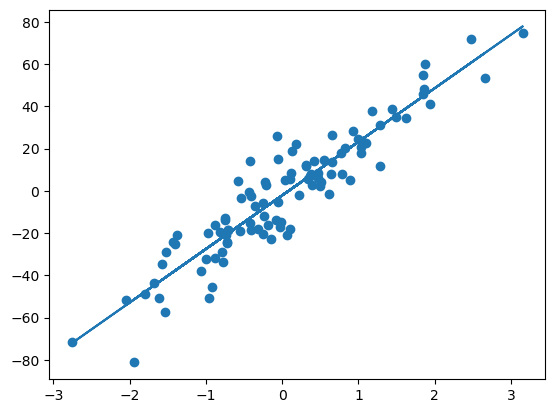

[0.94126592 0.87063933 0.83065739 0.85488337 0.65491649]


In [9]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

X, y = make_regression(n_samples=100, n_features=1, noise=10)

lr = LinearRegression()
lr.fit(X,y)
result = cross_validate(lr, X, y) 
plt.scatter(X,y)
plt.plot(X,lr.predict(X))
plt.show()
print(result['test_score'])